# IOH Xplainer

Demo using a small scale experiment of differential evolution from the scipy package.

First we define the `search space` and the algorithm runner, basically the hyper-parameters and ranges you want to explore for a given optimization algorithm or modular algorithm. In this example we use the Differential Evolution implementation by [scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html) and we take a limited set of hyper-parameter options to explore.

In [ ]:
#!pip install iohxplainer

In [1]:
import numpy as np
from ConfigSpace import ConfigurationSpace
from scipy.optimize import differential_evolution
#import the xplainer package
from iohxplainer import explainer

confSpace = ConfigurationSpace(
    {
        "strategy": ["best1bin", "best1exp", "rand1exp", "randtobest1exp"],
        "popsize": [1, 2, 5, 10],
    }
) 

features = ["strategy", "popsize"]

def run_de(func, config, budget, dim, *args, **kwargs):
    bounds = [(-5,5)] * dim #define the boundaries
    result = differential_evolution(func, bounds, strategy=config.get("strategy"), popsize=config.get("popsize"))



de_explainer = explainer(
    run_de,
    confSpace,
    algname="Differential Evolution",
    dims=[2],  # we test in 2D for this example.
    fids=np.arange(1, 25),  # we use all 24 BBOB functions.
    iids=[1, 2, 3, 4, 5], # we use the first 5 instances for each BBOB function.
    reps=3, # we repeat each run 3 times with different random seeds.
    sampling_method="grid",  # can also be set to random, since we have a few options we can make a full enumeration of the space.
    grid_steps_dict={}, # only needed if we have continuous parameters.
    sample_size=None,  # only used with random sampling method
    budget=10000,  # evaluation budget of an optimization run.
    seed=1, # starting random seed for reproducability.
    verbose=True,
)

Inside the algorithm runner (`run_de`) we define the boundaries of the to be optimized function. Since we will be using the BBOB benchmark suite for this example, we set the boundaries to -5,5 for each dimension of the problem.

Next we create the `explainer` object and run the experiments.

In [2]:

#we start running the experiments in paralell and store intermediate results in a csv (to allow a restart when crashing)
de_explainer.run(paralell=True, start_index=0, checkpoint_file="checkpoint.csv")
#store the final results as pkl file.
de_explainer.save_results("de.pkl")

Evaluating 16 configurations.


100%|██████████| 16/16 [01:45<00:00,  6.59s/it]

      Unnamed: 0  fid  iid  dim  seed  popsize        strategy       auc  \
0              0    1    1    2     0        1        best1bin  0.997577   
1              1    1    1    2     1        1        best1bin  0.997806   
2              2    1    1    2     2        1        best1bin  0.996936   
3              0    1    2    2     0        1        best1bin  0.998317   
4              1    1    2    2     1        1        best1bin  0.998379   
...          ...  ...  ...  ...   ...      ...             ...       ...   
5755           1   24    4    2     1       10  randtobest1exp  0.315549   
5756           2   24    4    2     2       10  randtobest1exp  0.167046   
5757           0   24    5    2     0       10  randtobest1exp  0.165739   
5758           1   24    5    2     1       10  randtobest1exp  0.166264   
5759           2   24    5    2     2       10  randtobest1exp  0.225645   

      aucLarge  
0     0.998485  
1     0.998629  
2     0.998085  
3     0.998948  
4 

Finally we can analyze the run data and make various plots and reports.

In [3]:
from IPython.display import display
#start with visualizing the performance data

df = de_explainer.performance_stats()
display(df.style.bar(cmap='viridis'))

Processing d2 f1..
fitted model R2 train: 0.9265982833632362


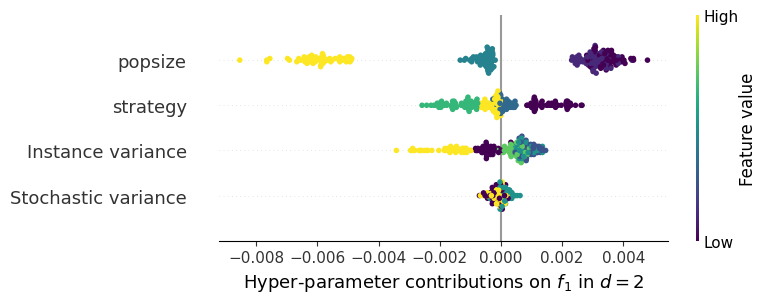

<Figure size 640x480 with 0 Axes>

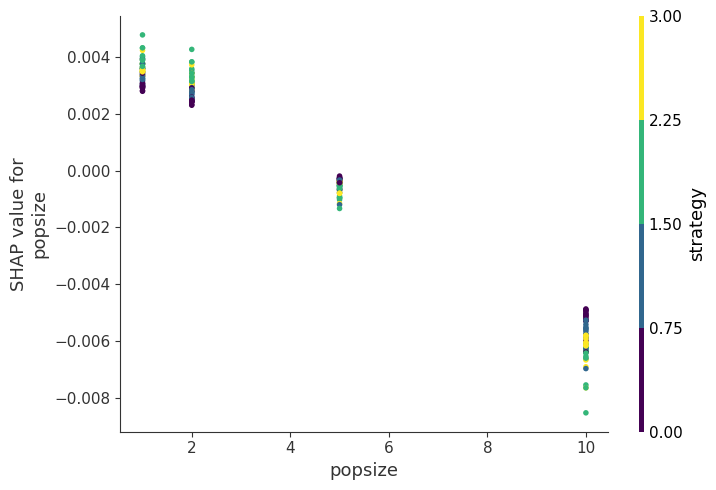

<Figure size 640x480 with 0 Axes>

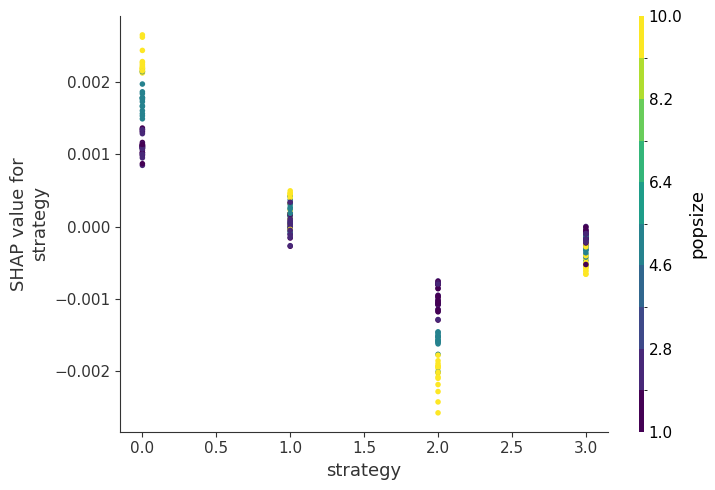

single best config  {'popsize': 1, 'strategy': 'best1bin'} with mean auc  0.9977377594599163


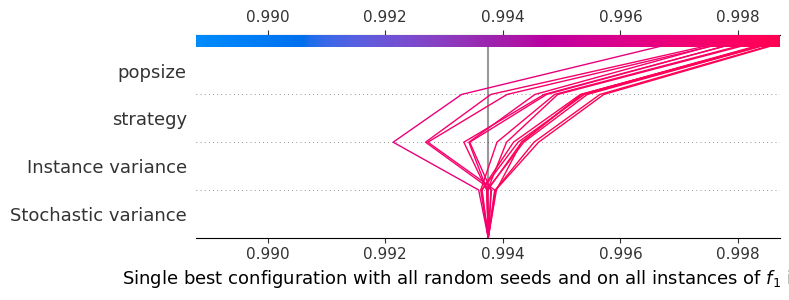

Processing d2 f2..
fitted model R2 train: 0.7066945818726258


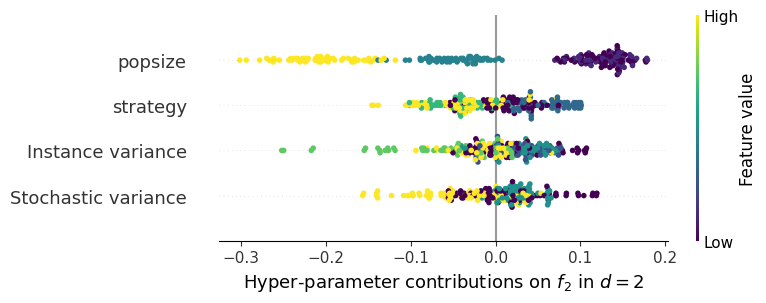

<Figure size 640x480 with 0 Axes>

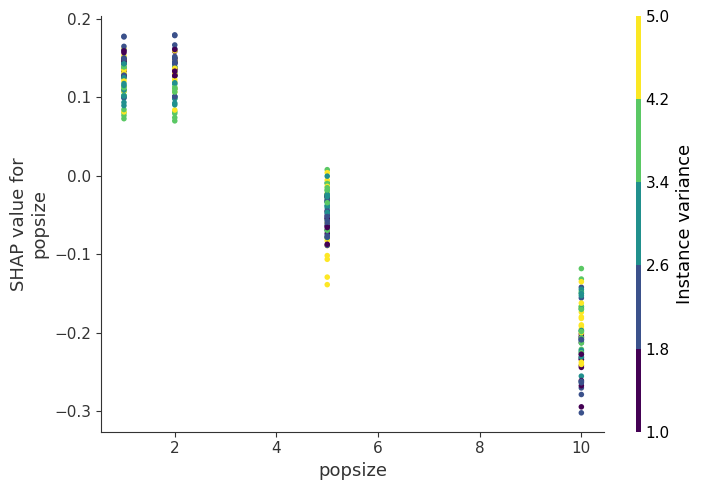

<Figure size 640x480 with 0 Axes>

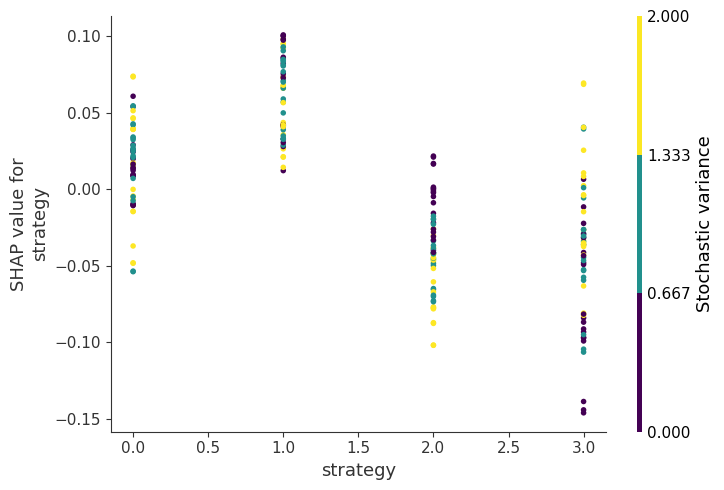

single best config  {'popsize': 1, 'strategy': 'best1exp'} with mean auc  0.9017781047047735


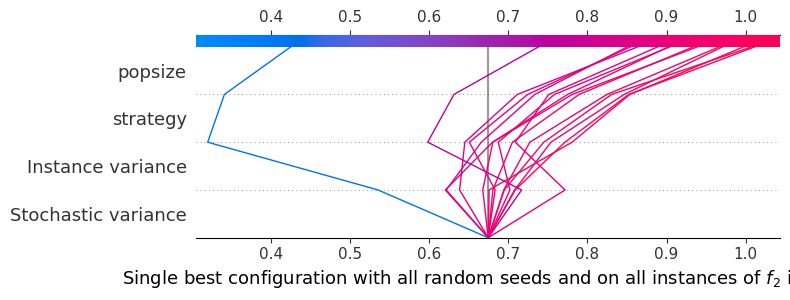

Processing d2 f3..
fitted model R2 train: 0.6242850290964904


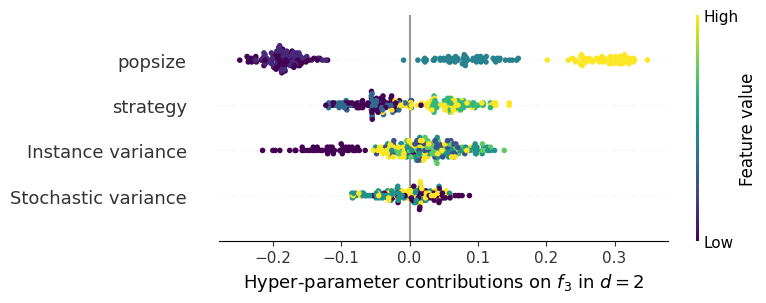

<Figure size 640x480 with 0 Axes>

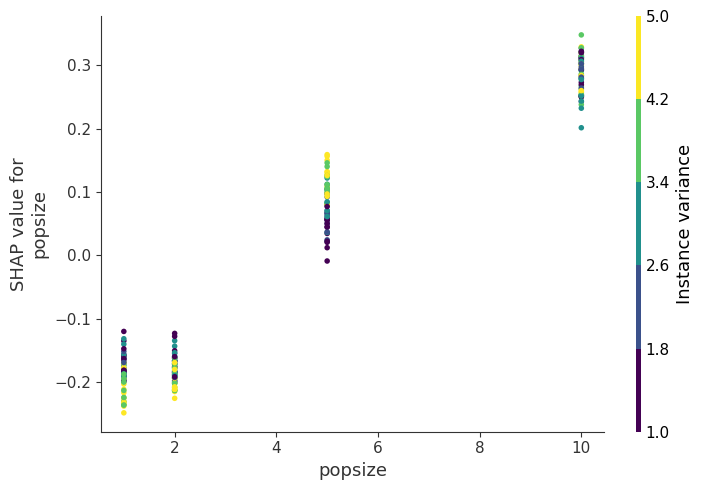

<Figure size 640x480 with 0 Axes>

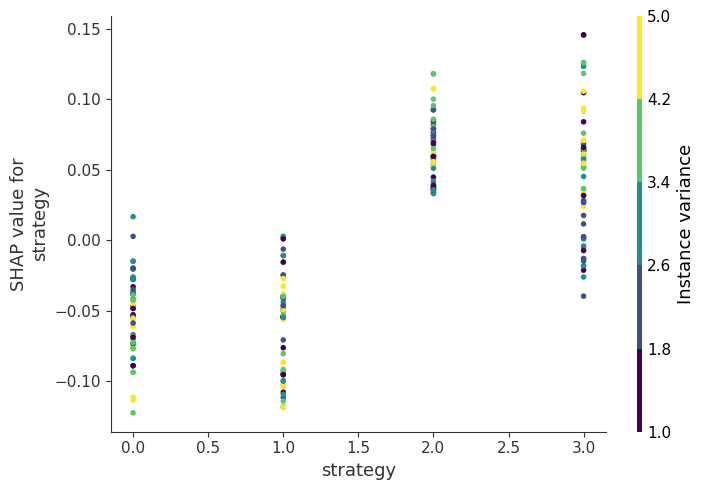

single best config  {'popsize': 10, 'strategy': 'rand1exp'} with mean auc  0.8723002767133509


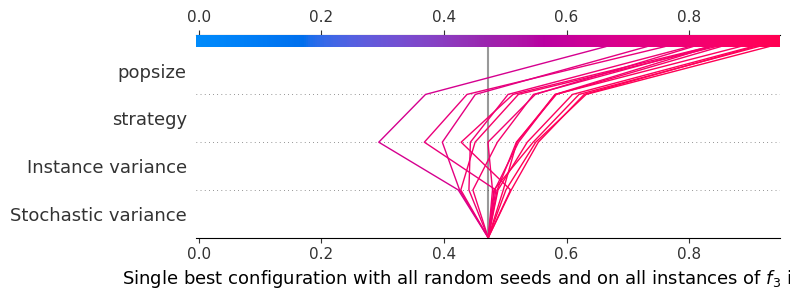

Processing d2 f4..
fitted model R2 train: 0.5101584614431153


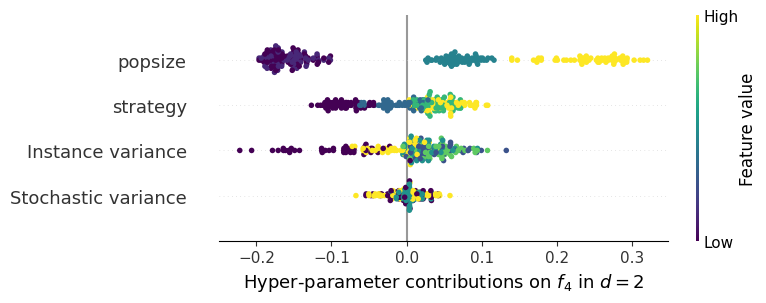

<Figure size 640x480 with 0 Axes>

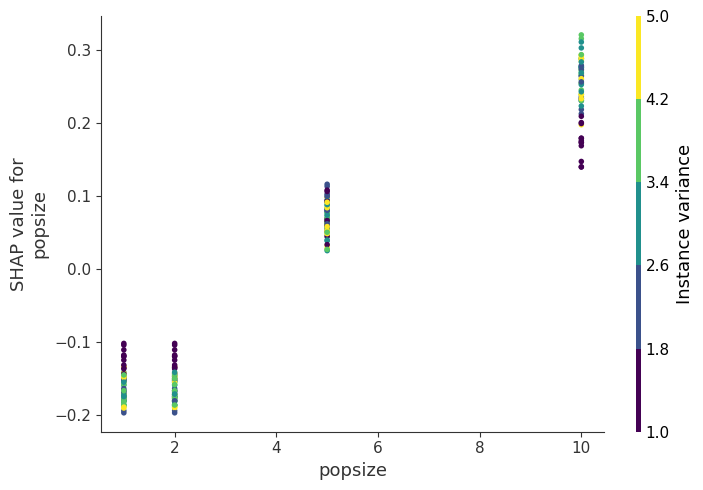

<Figure size 640x480 with 0 Axes>

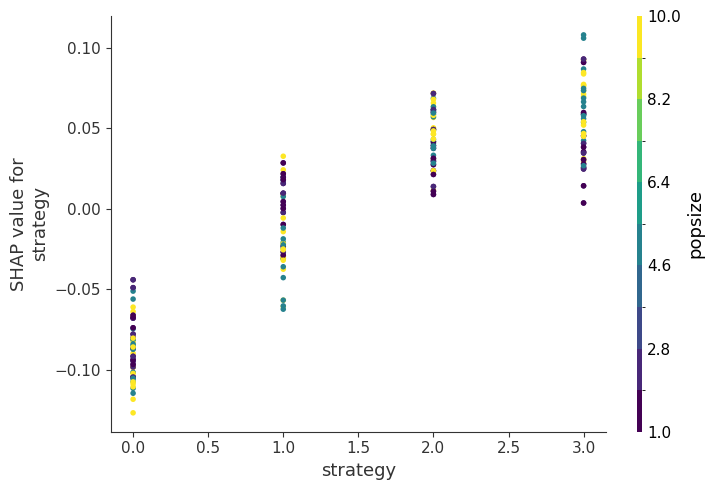

single best config  {'popsize': 10, 'strategy': 'randtobest1exp'} with mean auc  0.7187673466253635


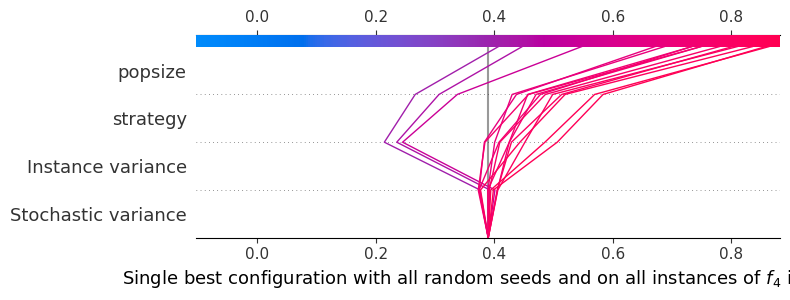

Processing d2 f5..
fitted model R2 train: 0.9495111622555856


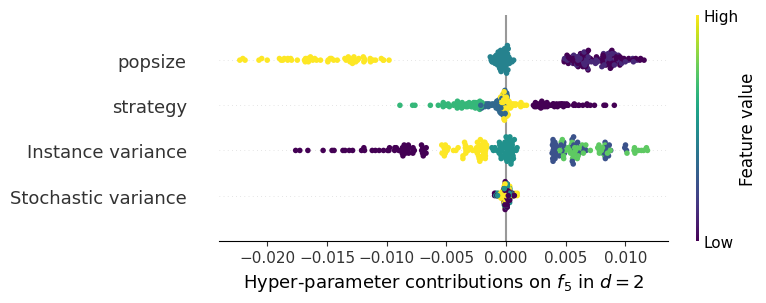

<Figure size 640x480 with 0 Axes>

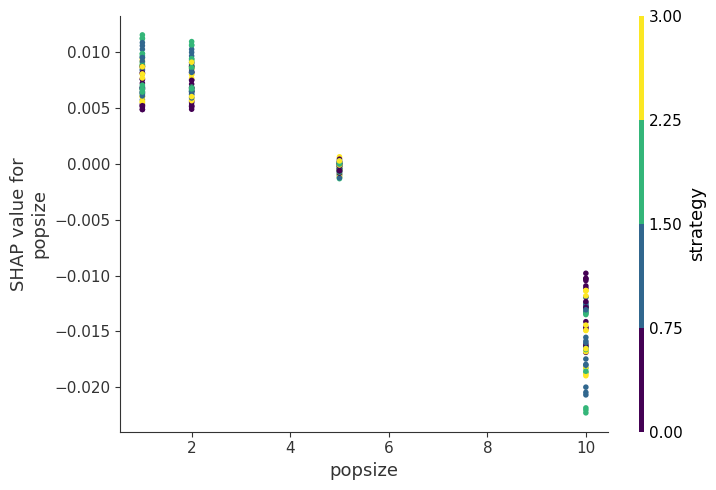

<Figure size 640x480 with 0 Axes>

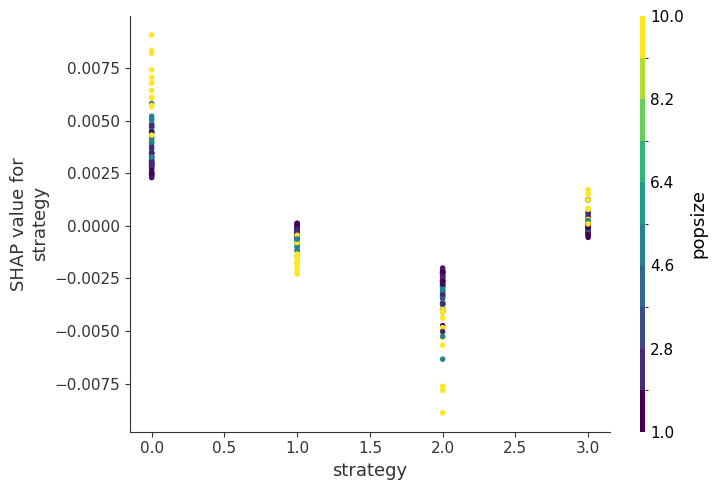

single best config  {'popsize': 1, 'strategy': 'best1bin'} with mean auc  0.9955794061141513


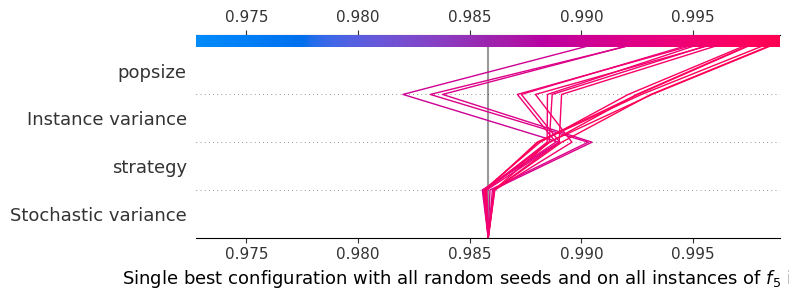

Processing d2 f6..
fitted model R2 train: 0.6381857510666518


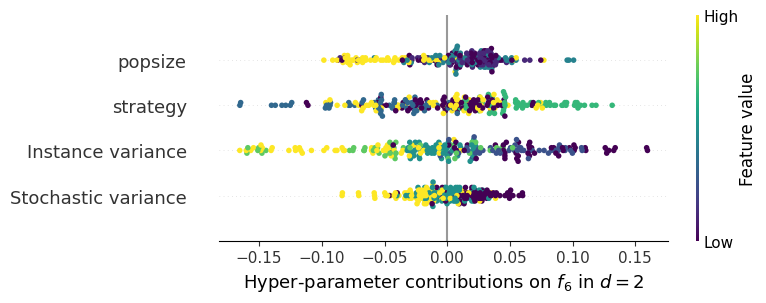

<Figure size 640x480 with 0 Axes>

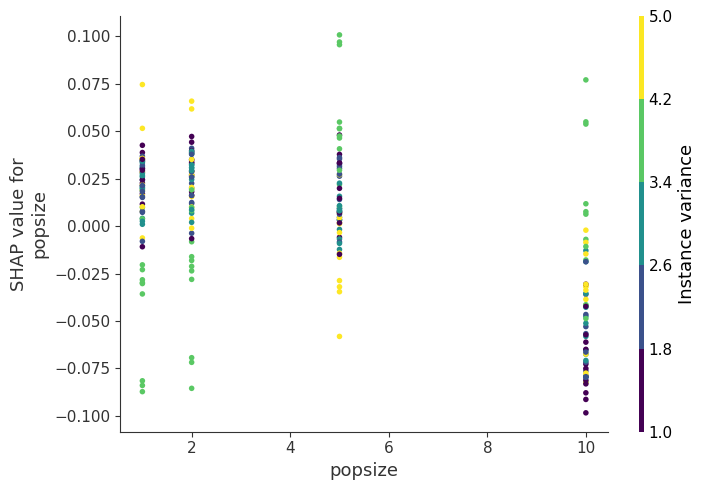

<Figure size 640x480 with 0 Axes>

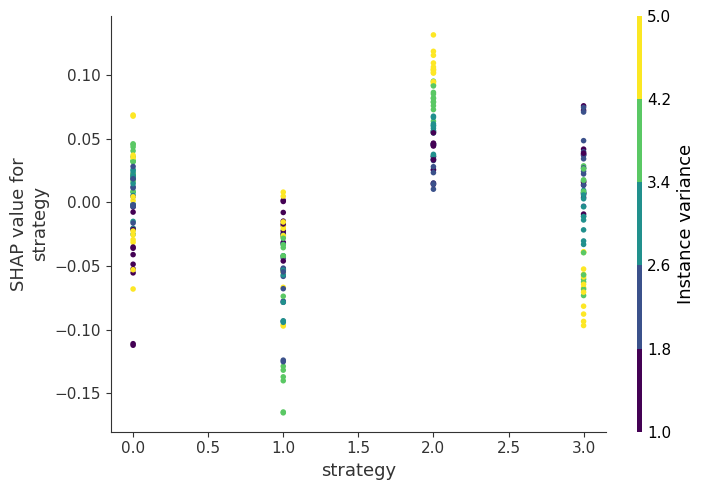

single best config  {'popsize': 5, 'strategy': 'rand1exp'} with mean auc  0.8412820061679351


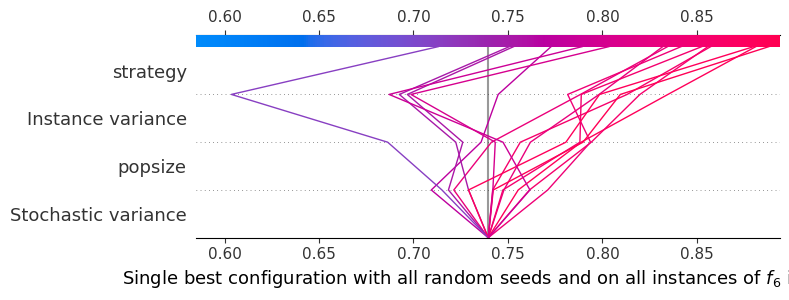

Processing d2 f7..
fitted model R2 train: 0.658817606489428


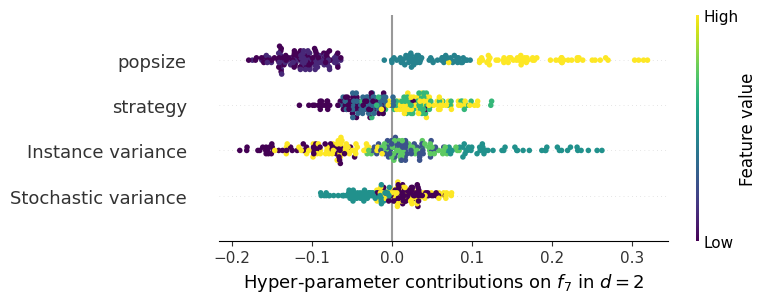

<Figure size 640x480 with 0 Axes>

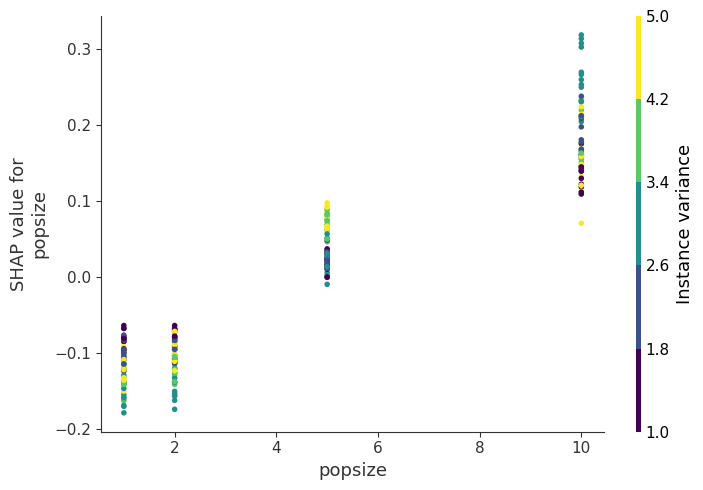

<Figure size 640x480 with 0 Axes>

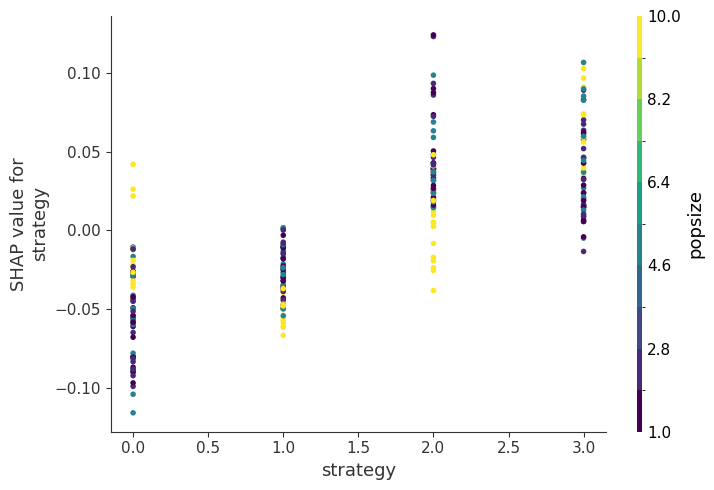

single best config  {'popsize': 10, 'strategy': 'randtobest1exp'} with mean auc  0.7027837441561149


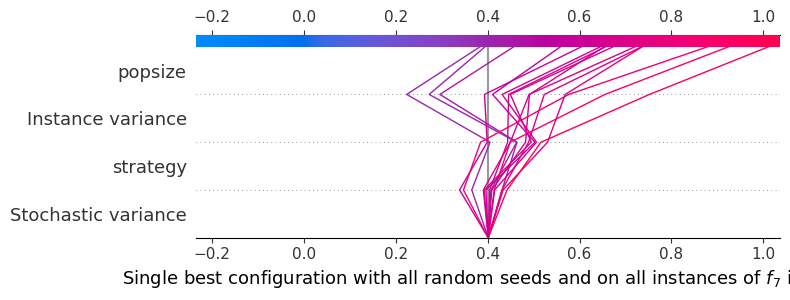

Processing d2 f8..
fitted model R2 train: 0.6344189543928471


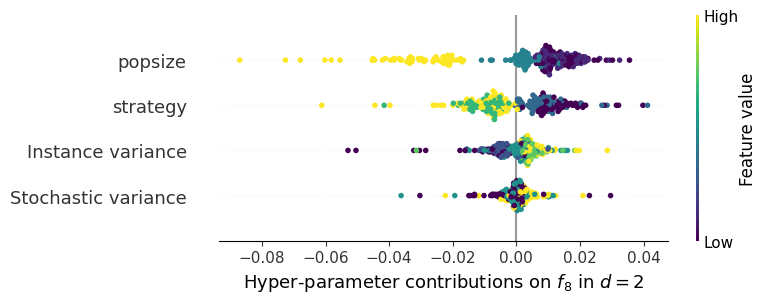

<Figure size 640x480 with 0 Axes>

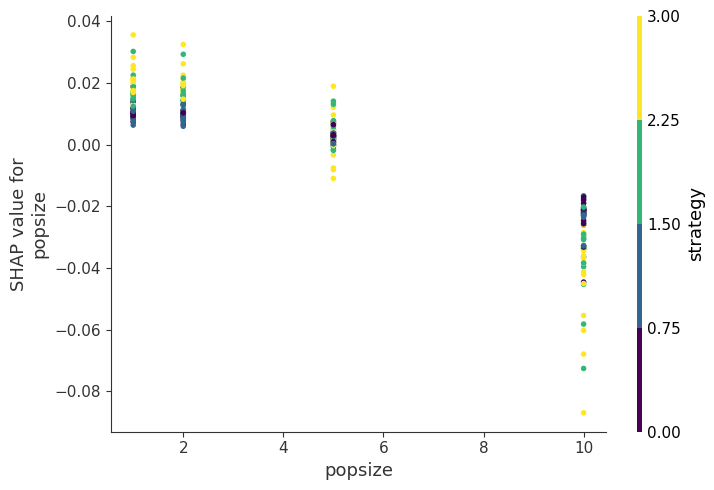

<Figure size 640x480 with 0 Axes>

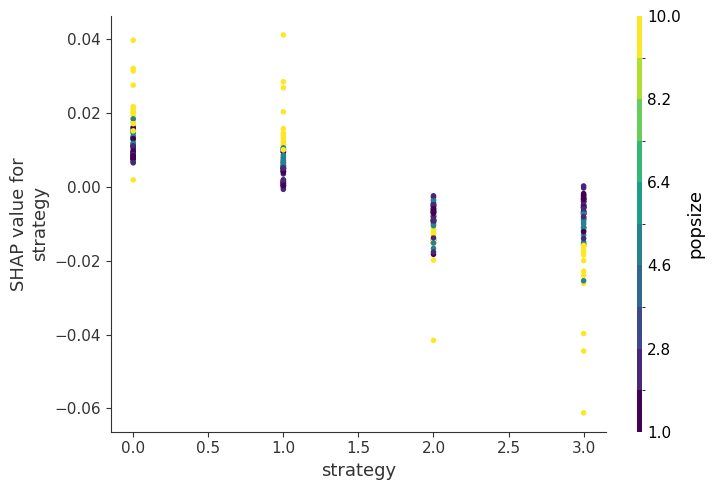

single best config  {'popsize': 1, 'strategy': 'best1bin'} with mean auc  0.9886318148107363


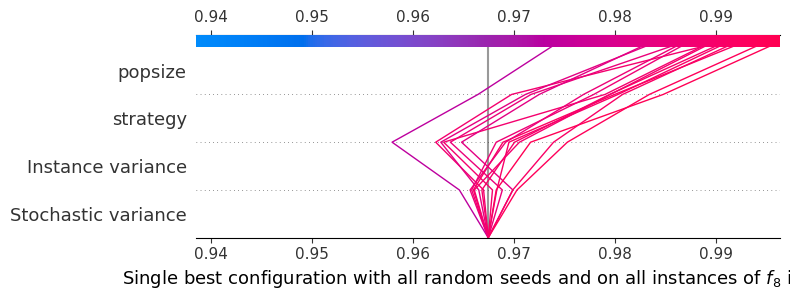

Processing d2 f9..
fitted model R2 train: 0.5751143348403324


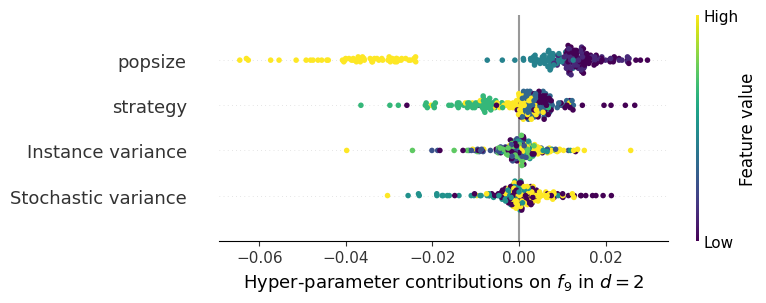

<Figure size 640x480 with 0 Axes>

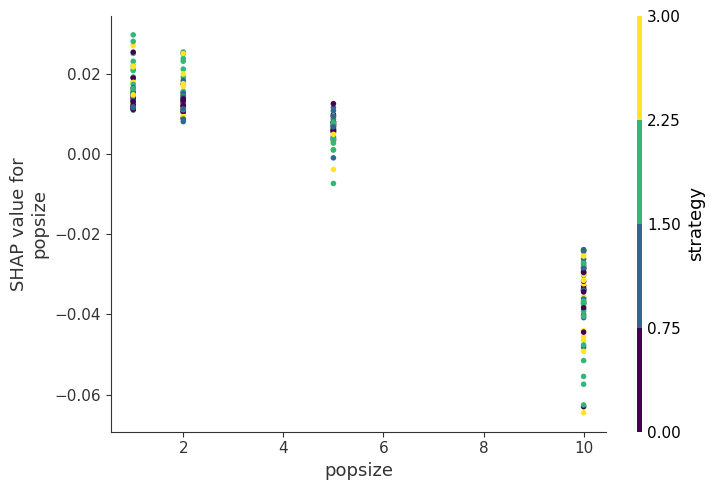

<Figure size 640x480 with 0 Axes>

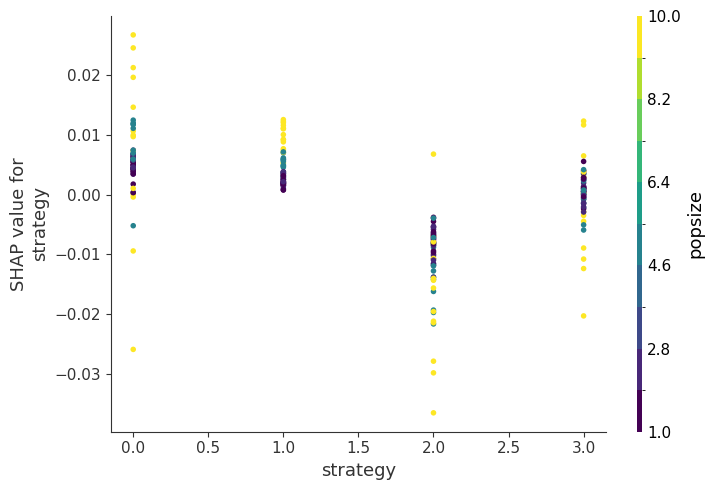

single best config  {'popsize': 1, 'strategy': 'best1bin'} with mean auc  0.9900539763815299


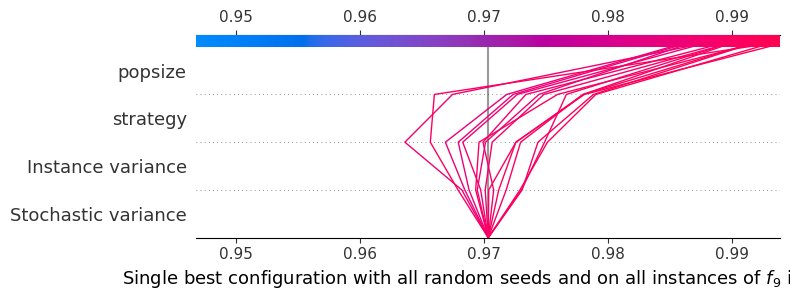

Processing d2 f10..
fitted model R2 train: 0.5796436642360626


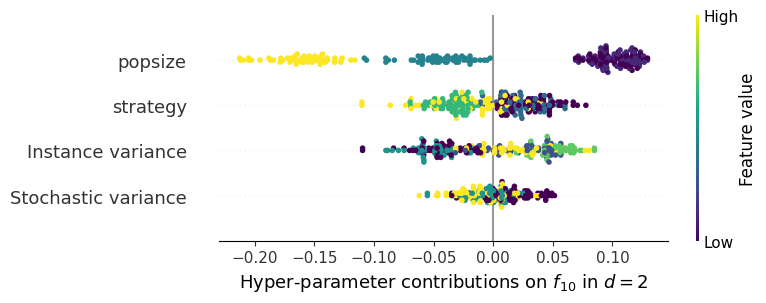

<Figure size 640x480 with 0 Axes>

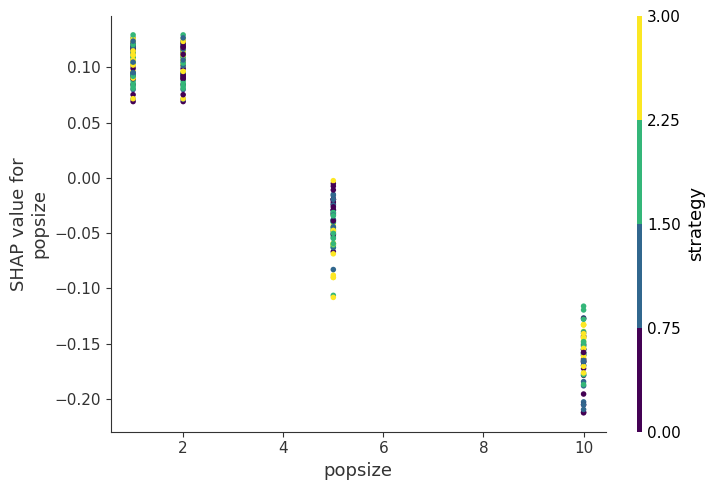

<Figure size 640x480 with 0 Axes>

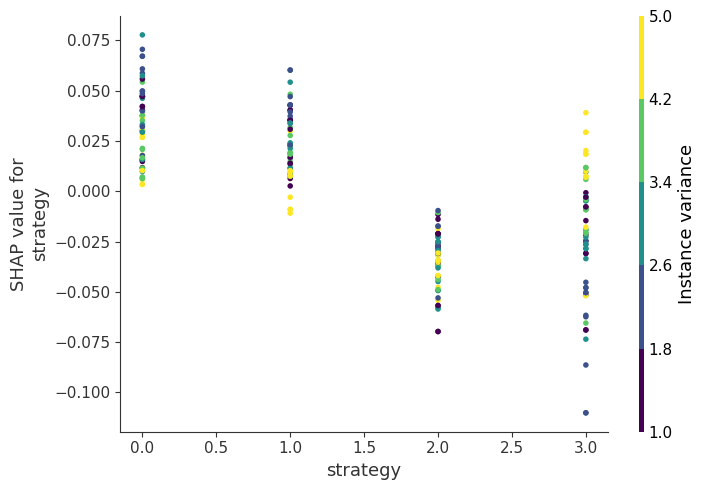

single best config  {'popsize': 1, 'strategy': 'best1exp'} with mean auc  0.8345632971599584


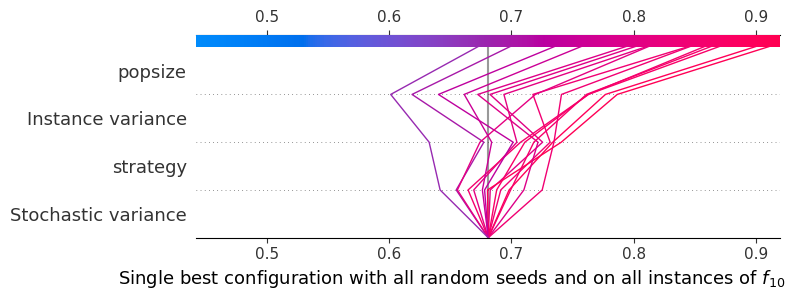

Processing d2 f11..
fitted model R2 train: 0.6081653978350468


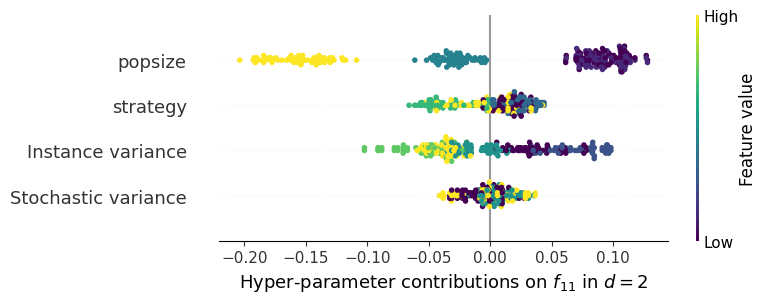

<Figure size 640x480 with 0 Axes>

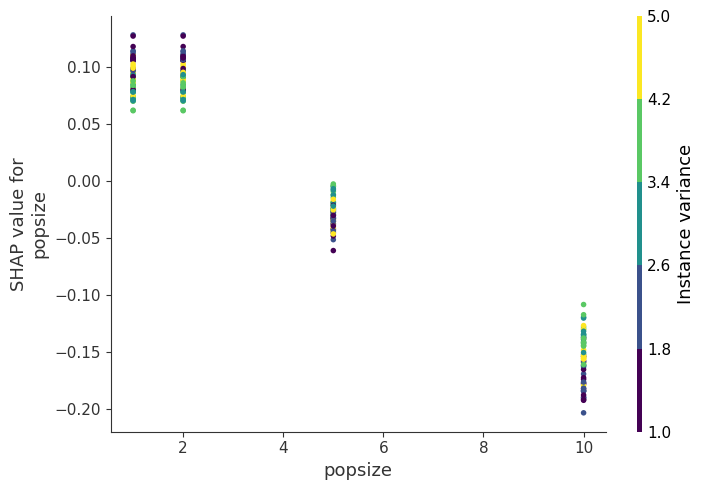

<Figure size 640x480 with 0 Axes>

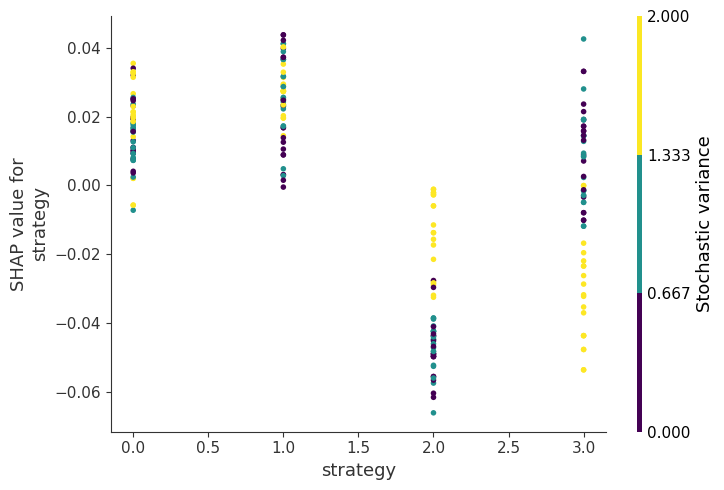

single best config  {'popsize': 1, 'strategy': 'best1exp'} with mean auc  0.7544204611675451


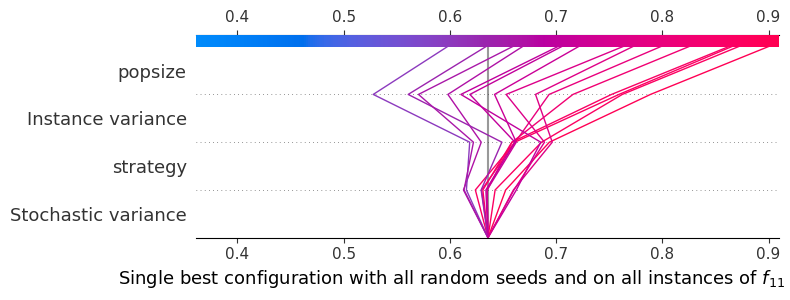

Processing d2 f12..
fitted model R2 train: 0.6162499608321886


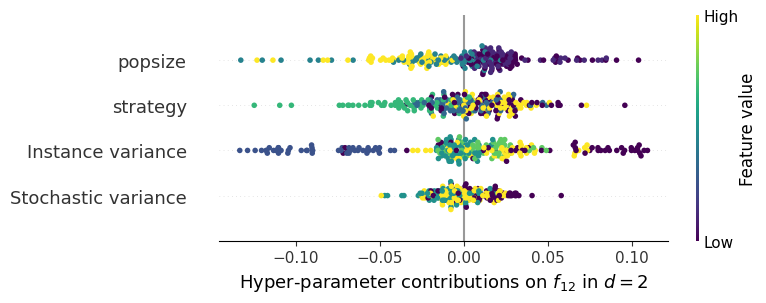

<Figure size 640x480 with 0 Axes>

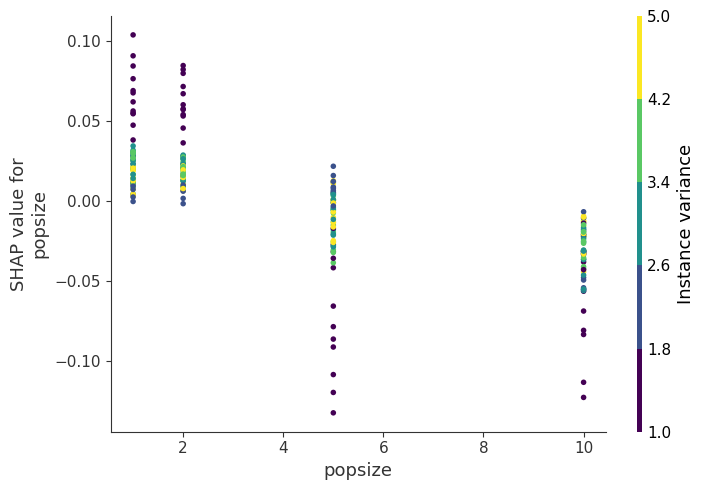

<Figure size 640x480 with 0 Axes>

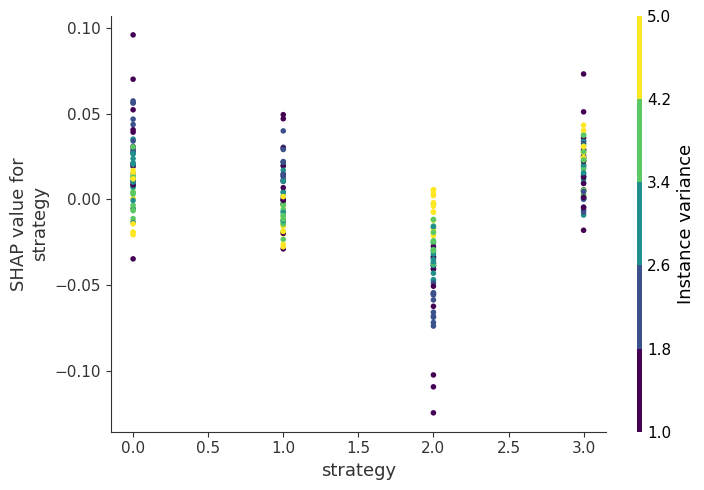

single best config  {'popsize': 1, 'strategy': 'randtobest1exp'} with mean auc  0.8644500284138712


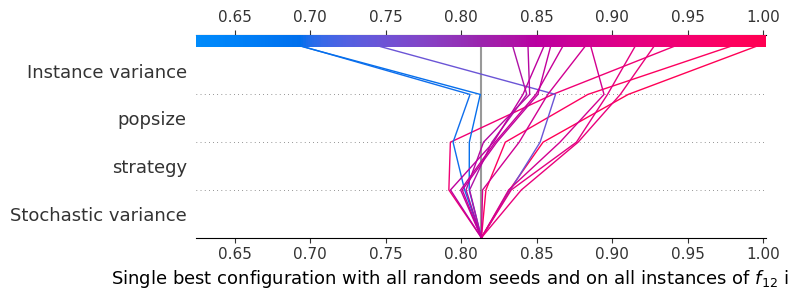

Processing d2 f13..
fitted model R2 train: 0.6525842504491692


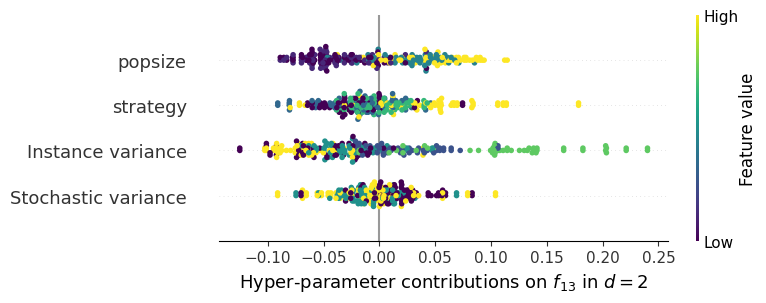

<Figure size 640x480 with 0 Axes>

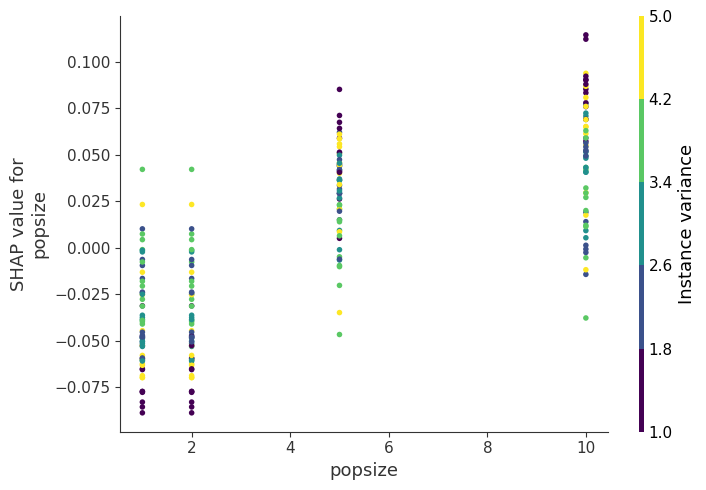

<Figure size 640x480 with 0 Axes>

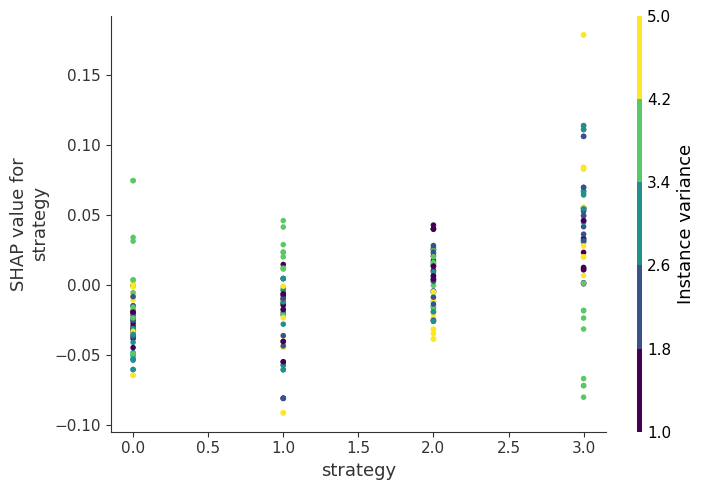

single best config  {'popsize': 10, 'strategy': 'best1exp'} with mean auc  0.4119452792714416


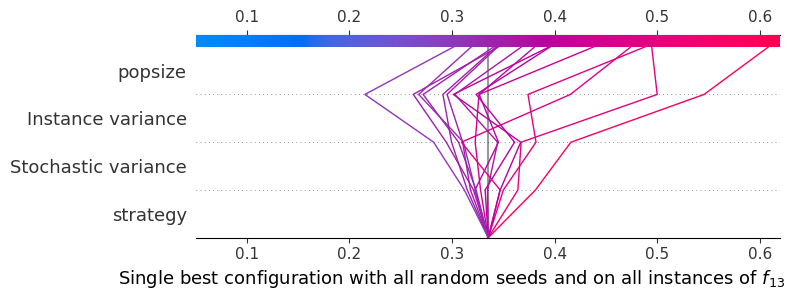

Processing d2 f14..
fitted model R2 train: 0.481924870973243


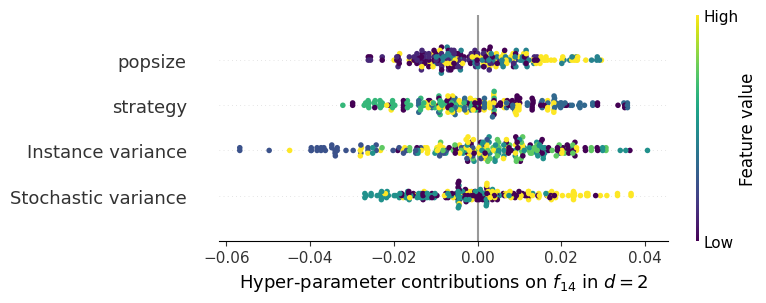

<Figure size 640x480 with 0 Axes>

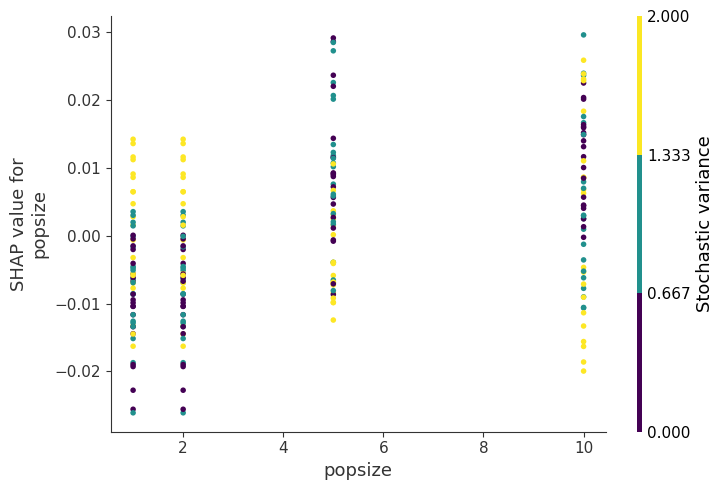

<Figure size 640x480 with 0 Axes>

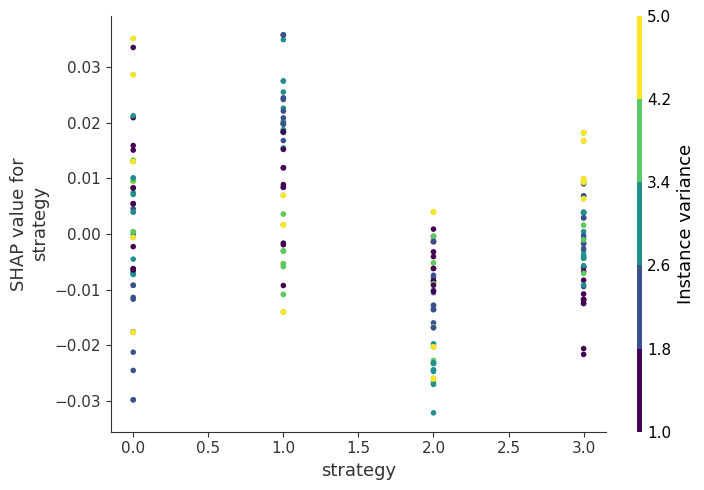

single best config  {'popsize': 10, 'strategy': 'best1bin'} with mean auc  0.842117587714493


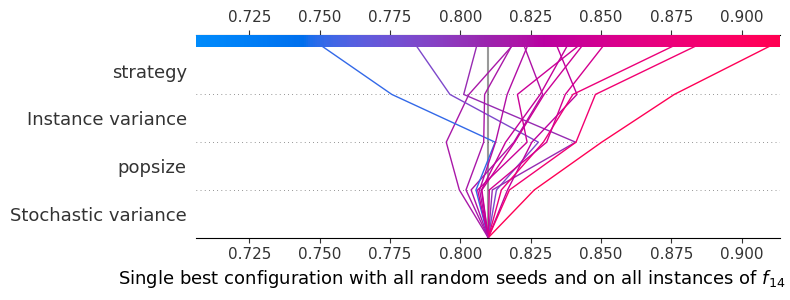

Processing d2 f15..
fitted model R2 train: 0.5855787664049497


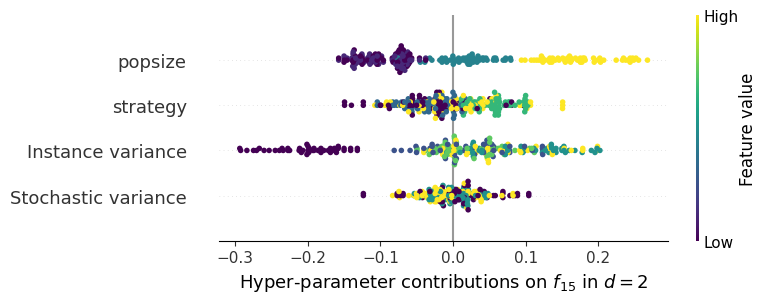

<Figure size 640x480 with 0 Axes>

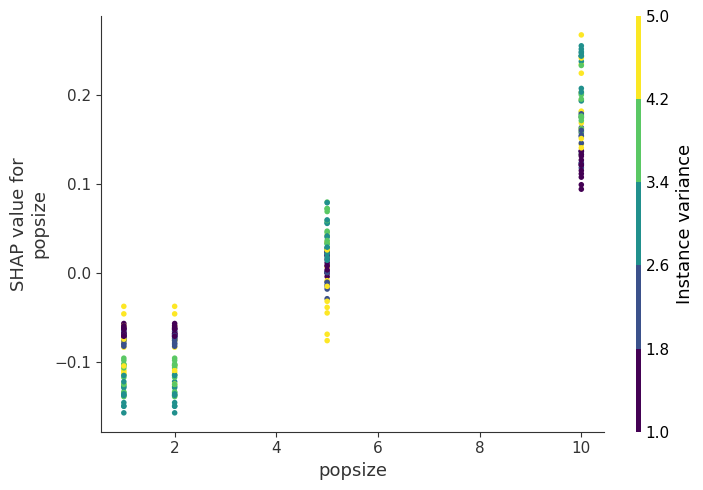

<Figure size 640x480 with 0 Axes>

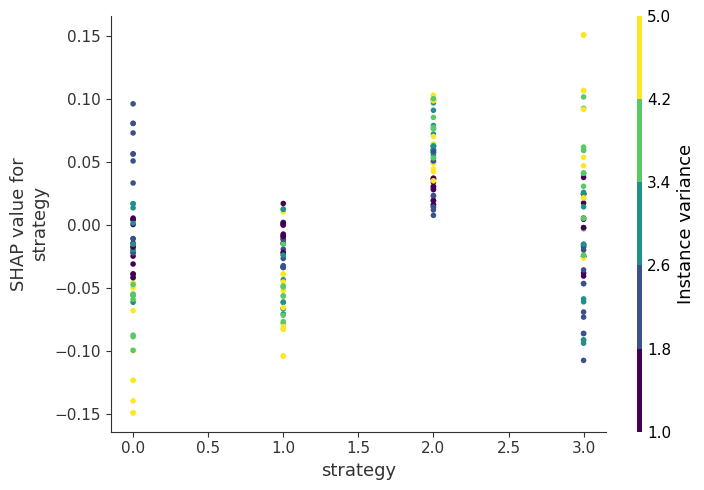

single best config  {'popsize': 10, 'strategy': 'rand1exp'} with mean auc  0.6219308904470873


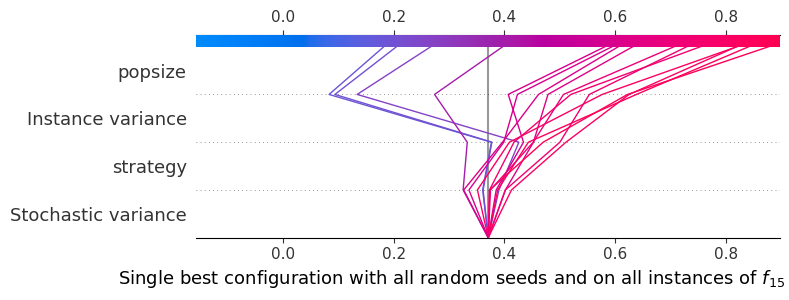

Processing d2 f16..
fitted model R2 train: 0.654242753212507


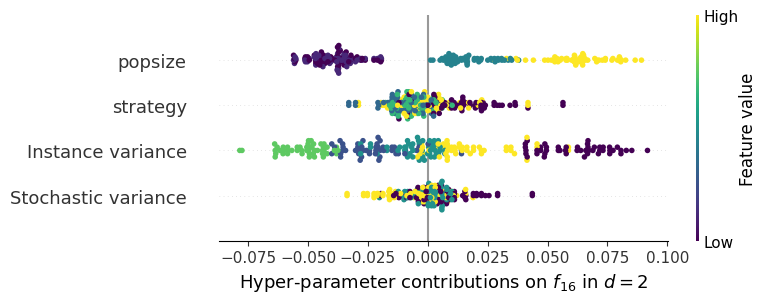

<Figure size 640x480 with 0 Axes>

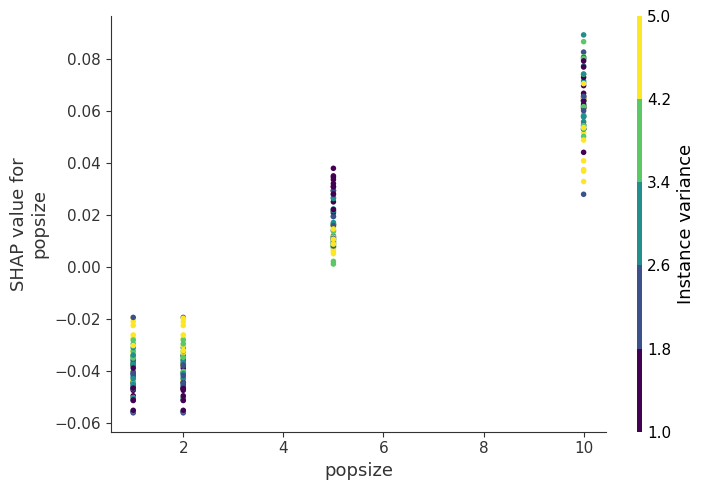

<Figure size 640x480 with 0 Axes>

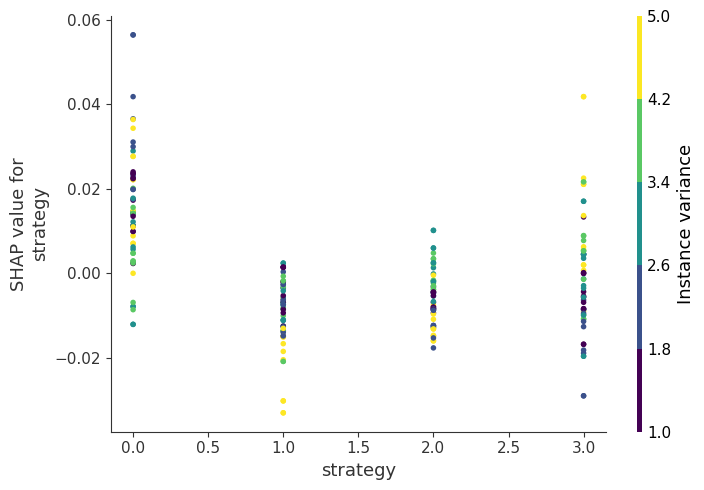

single best config  {'popsize': 10, 'strategy': 'best1bin'} with mean auc  0.3690270029803451


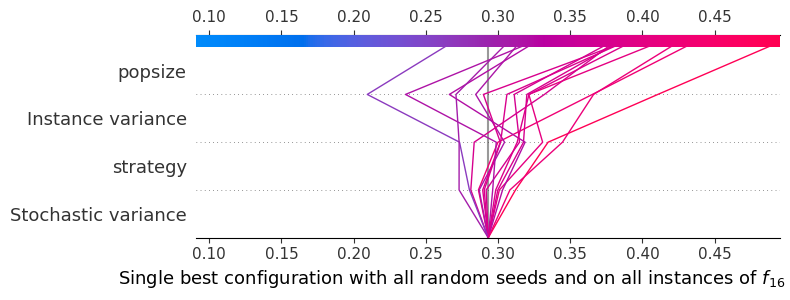

Processing d2 f17..
fitted model R2 train: 0.7561316081043936


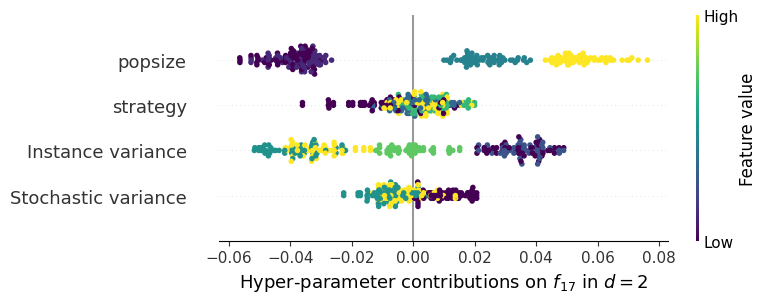

<Figure size 640x480 with 0 Axes>

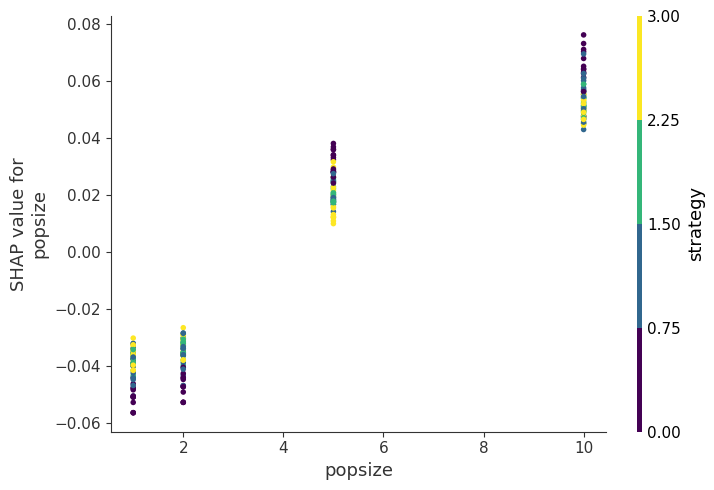

<Figure size 640x480 with 0 Axes>

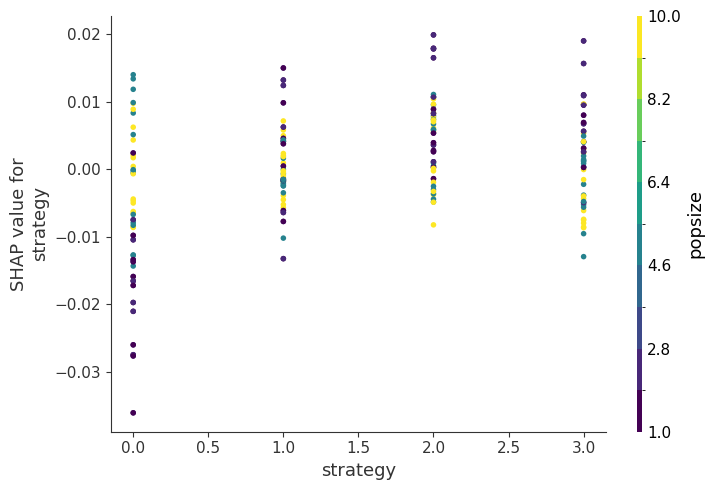

single best config  {'popsize': 10, 'strategy': 'best1bin'} with mean auc  0.331237645124234


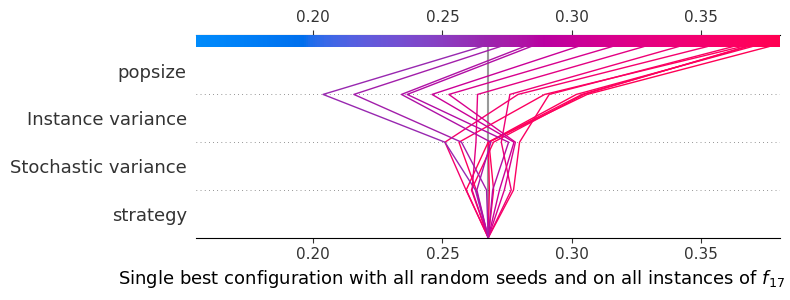

Processing d2 f18..
fitted model R2 train: 0.7336962389547816


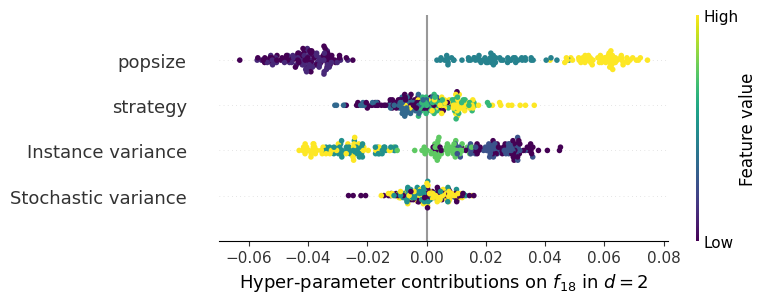

<Figure size 640x480 with 0 Axes>

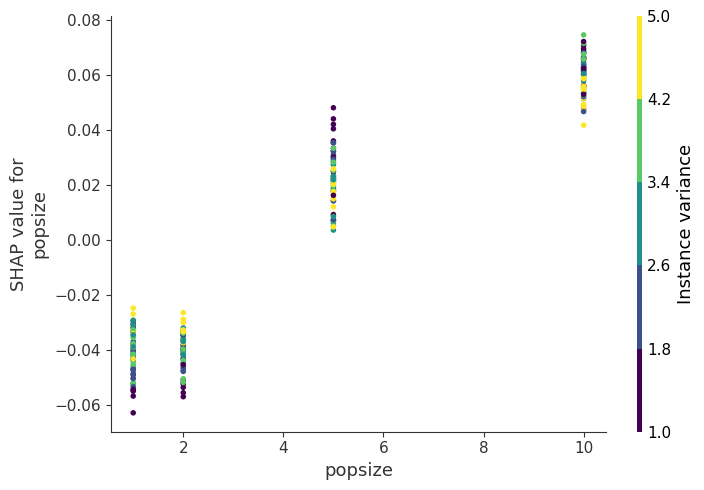

<Figure size 640x480 with 0 Axes>

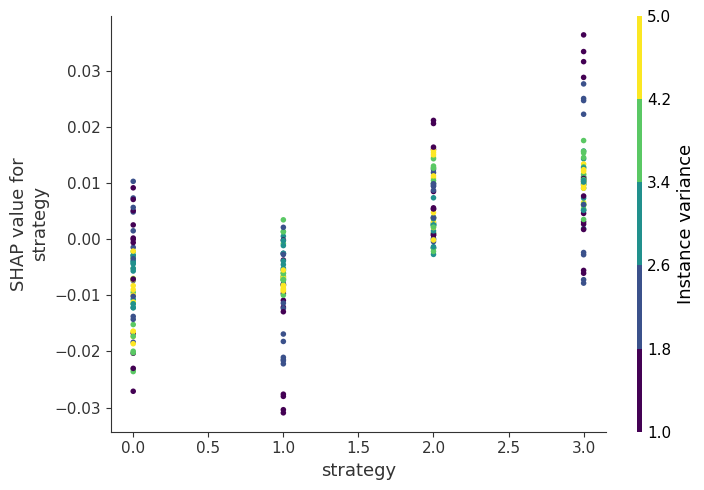

single best config  {'popsize': 10, 'strategy': 'randtobest1exp'} with mean auc  0.3160320444604877


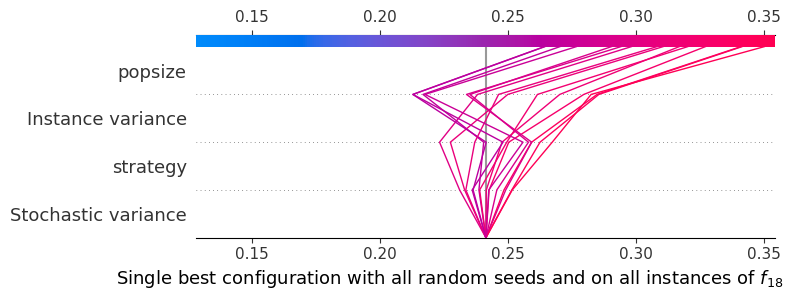

Processing d2 f19..
fitted model R2 train: 0.5691642430793884


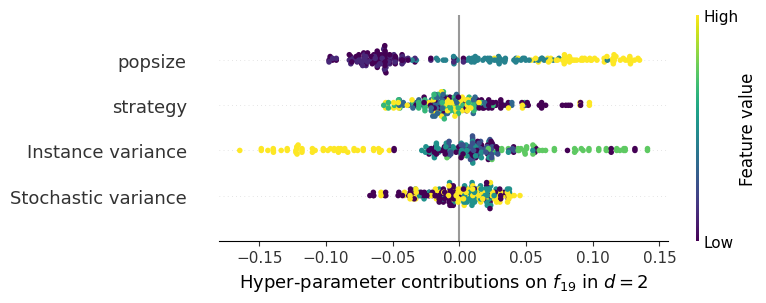

<Figure size 640x480 with 0 Axes>

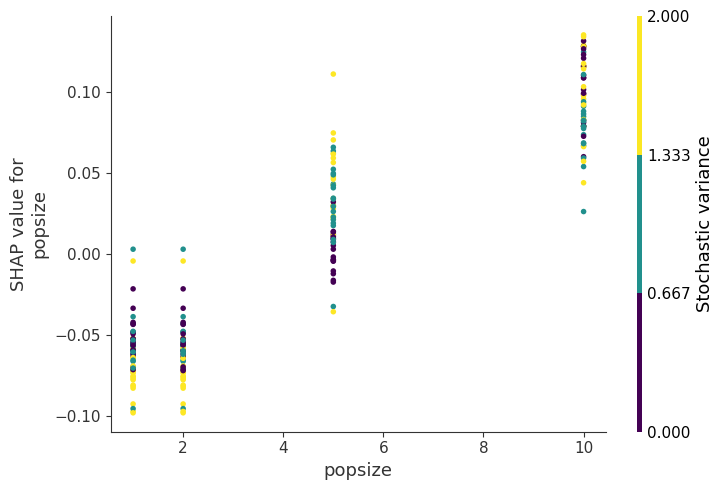

<Figure size 640x480 with 0 Axes>

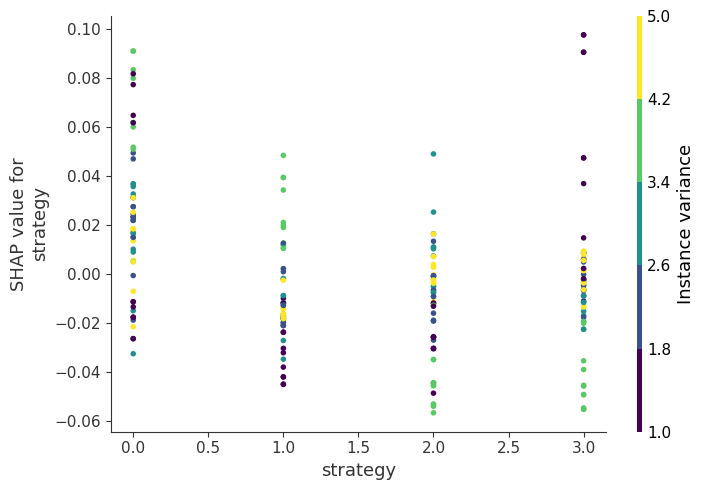

single best config  {'popsize': 10, 'strategy': 'best1exp'} with mean auc  0.49436108843187


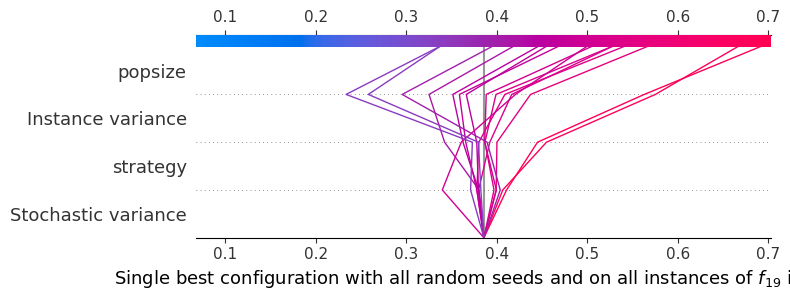

Processing d2 f20..
fitted model R2 train: 0.7003090725926331


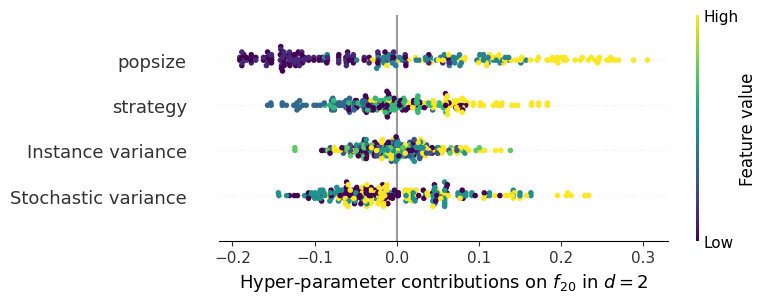

<Figure size 640x480 with 0 Axes>

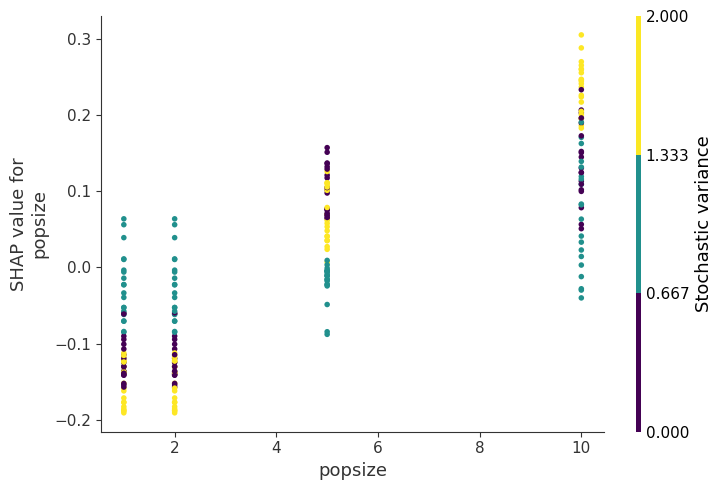

<Figure size 640x480 with 0 Axes>

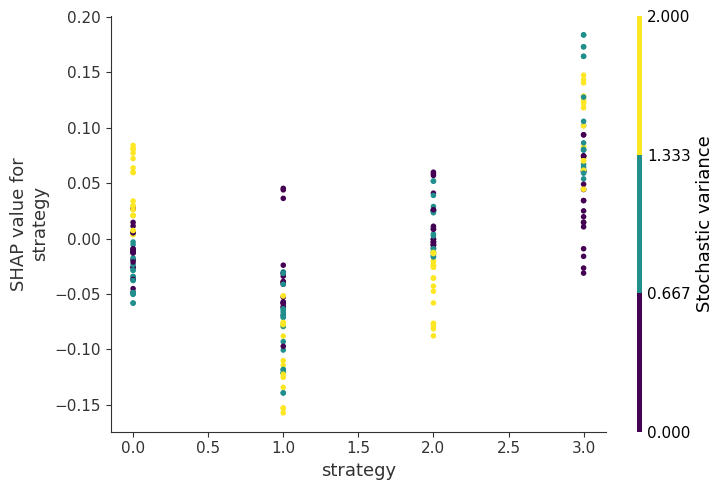

single best config  {'popsize': 10, 'strategy': 'randtobest1exp'} with mean auc  0.6107579182379472


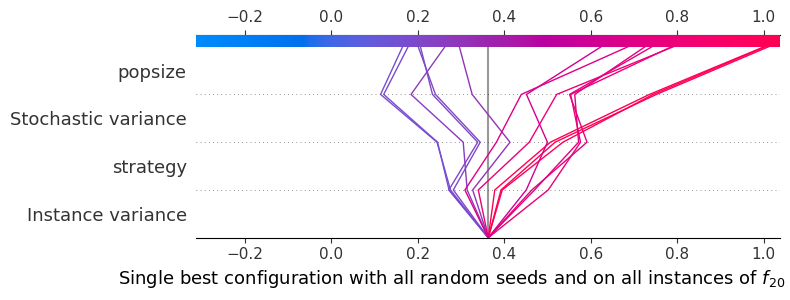

Processing d2 f21..
fitted model R2 train: 0.6194859853157264


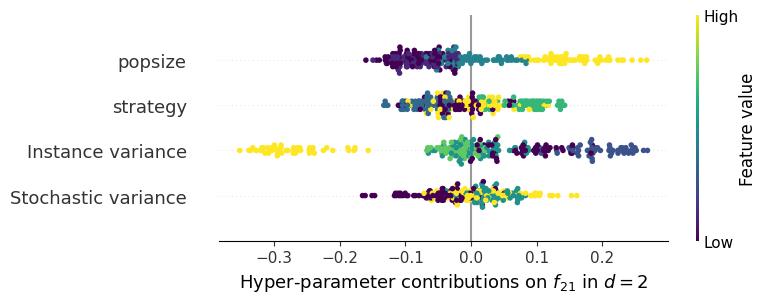

<Figure size 640x480 with 0 Axes>

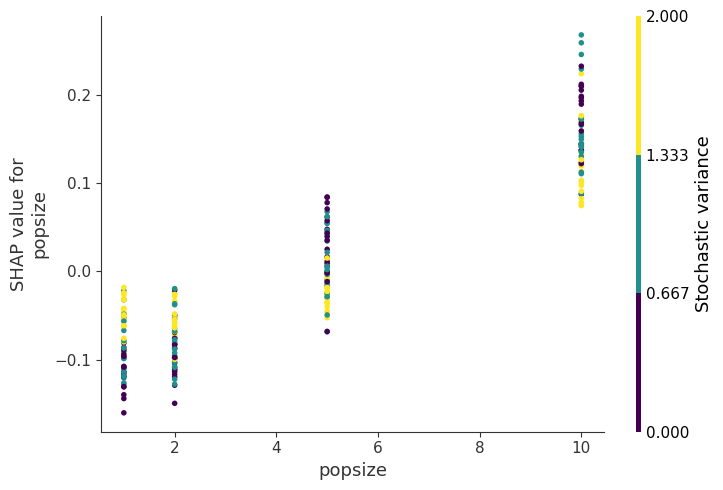

<Figure size 640x480 with 0 Axes>

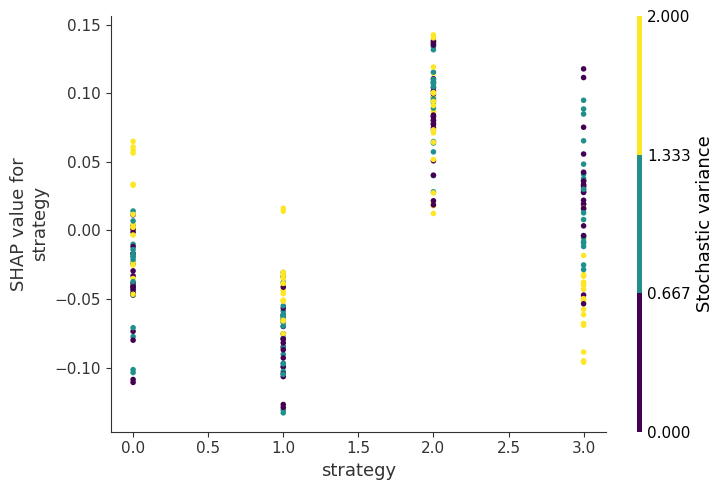

single best config  {'popsize': 10, 'strategy': 'rand1exp'} with mean auc  0.8437592985480559


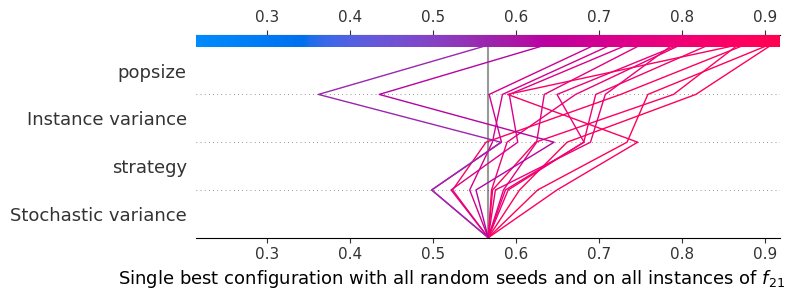

Processing d2 f22..
fitted model R2 train: 0.6286457641472007


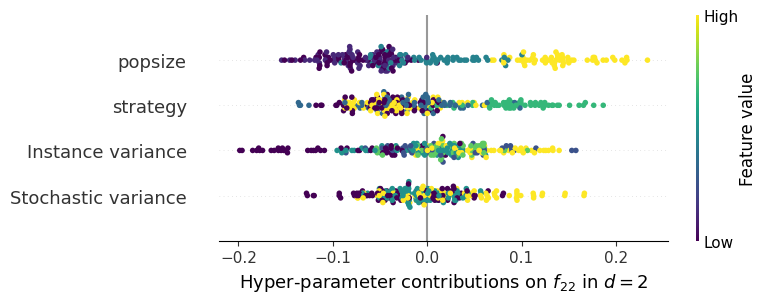

<Figure size 640x480 with 0 Axes>

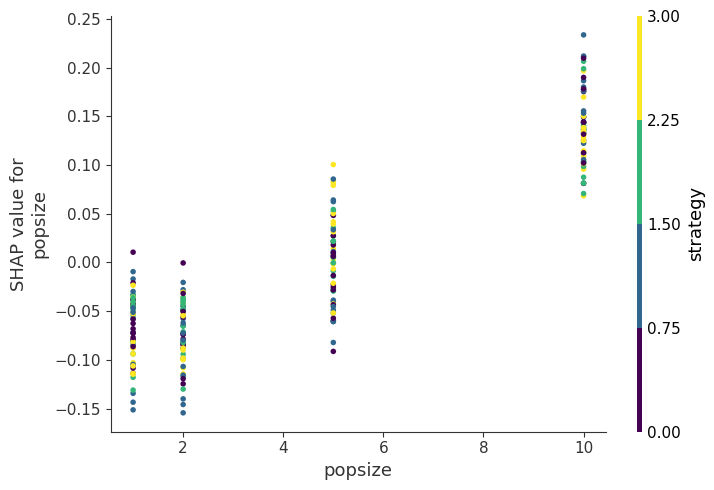

<Figure size 640x480 with 0 Axes>

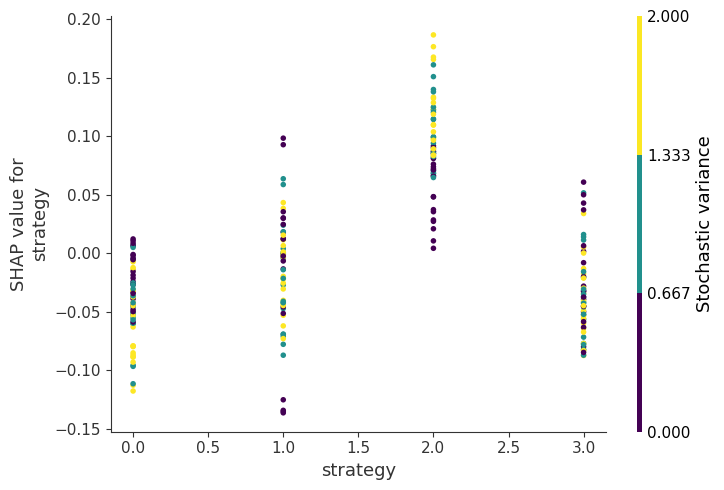

single best config  {'popsize': 10, 'strategy': 'best1exp'} with mean auc  0.8473498972736349


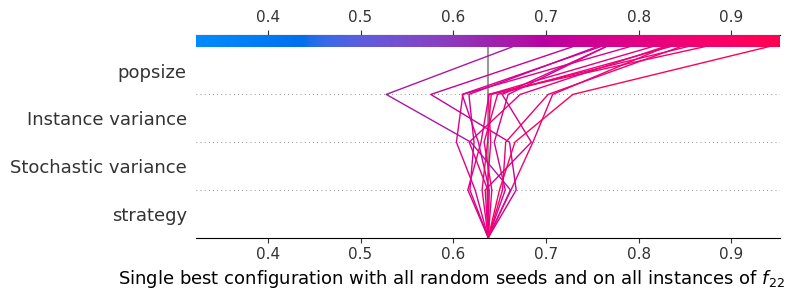

Processing d2 f23..
fitted model R2 train: 0.649207601614368


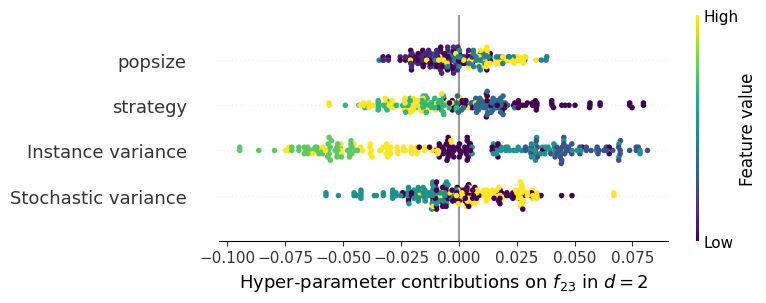

<Figure size 640x480 with 0 Axes>

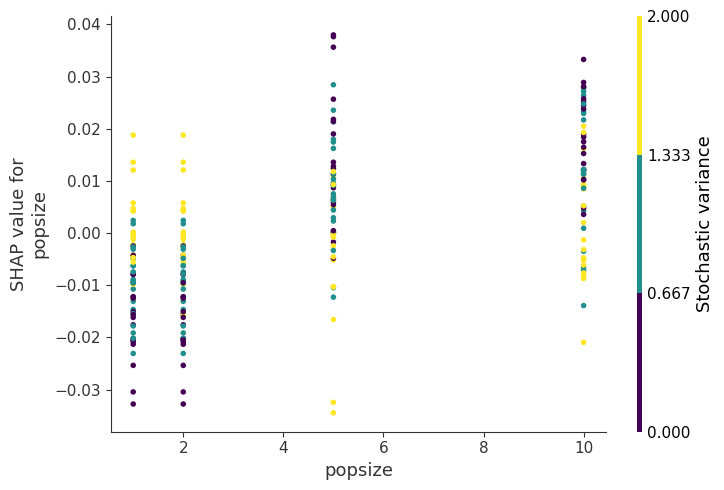

<Figure size 640x480 with 0 Axes>

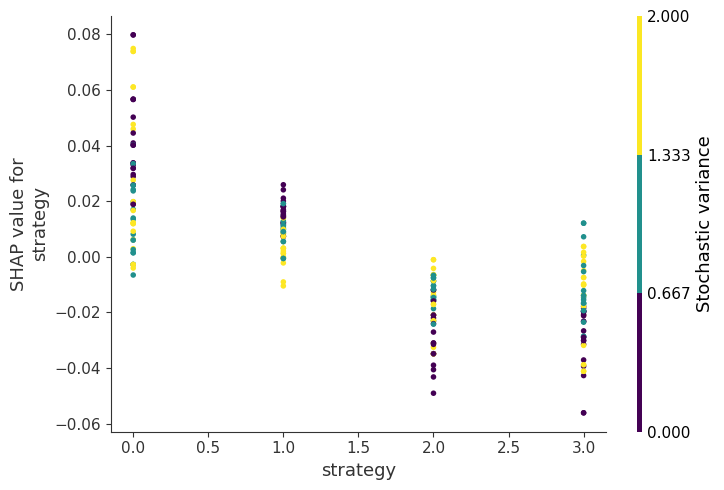

single best config  {'popsize': 10, 'strategy': 'best1bin'} with mean auc  0.3315097480037362


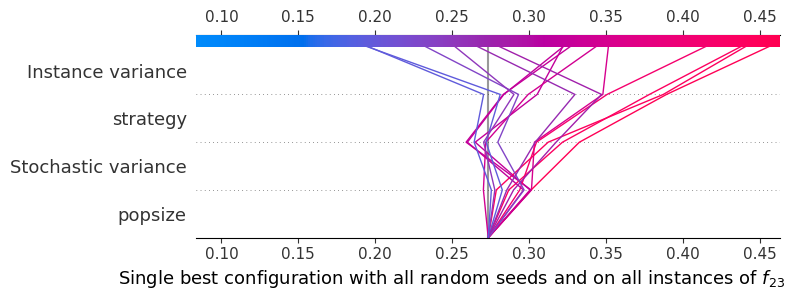

Processing d2 f24..
fitted model R2 train: 0.535939574095752


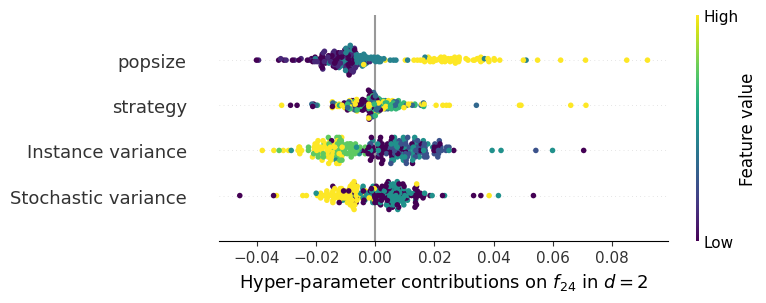

<Figure size 640x480 with 0 Axes>

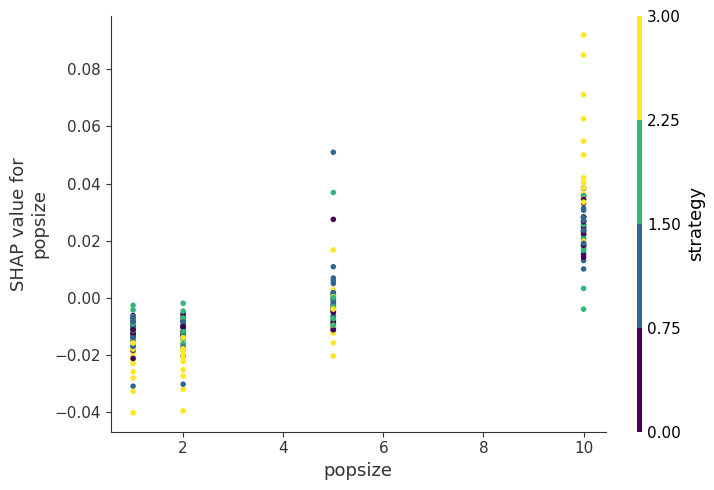

<Figure size 640x480 with 0 Axes>

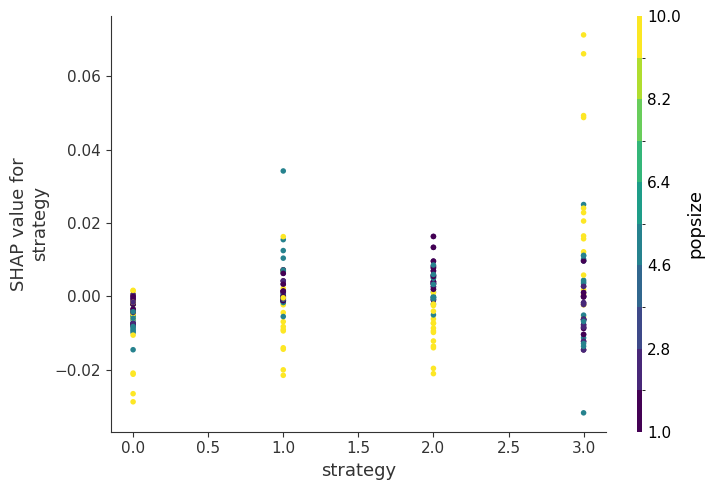

single best config  {'popsize': 10, 'strategy': 'randtobest1exp'} with mean auc  0.26336876574017115


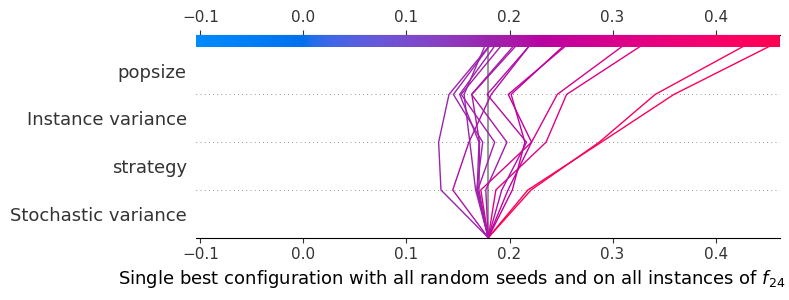

<Figure size 640x480 with 0 Axes>

In [4]:
#explain the performance for each hyper-parameter

#we want a small tree model as it would otherwise take a lot of time, this is for demo purpose only.
catboost_params = {
                "iterations": 10,
                "depth": 6,
            }
de_explainer.explain(partial_dependence=True, best_config=True,keep_order=True,catboost_params=catboost_params)